In [3]:
from astroquery.svo_fps import SvoFps
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Get the list of all OAJ/JPCam filters from Spanish Virtual Observatory's Filter Profile Service
filter_list = SvoFps.get_filter_list(facility='OAJ', instrument='JPCam').to_pandas()
filter_list['Type'] = np.where(filter_list['FWHM']<160, 'Narrow', np.where(filter_list['FWHM']<500, 'Medium1', np.where(filter_list['FWHM']<590, 'Medium2', np.where(filter_list['FWHM']<1200, 'Broad', 'BroadSDSS'))))
filter_list.head(2)


,FilterProfileService,filterID,WavelengthUnit,WavelengthUCD,PhotSystem,DetectorType,Band,Instrument,Facility,ProfileReference,...,Fsun,PhotCalID,MagSys,ZeroPoint,ZeroPointUnit,Mag0,ZeroPointType,AsinhSoft,TrasmissionCurve,Type
0,ivo://svo/fps,OAJ/JPAS.uJava,Angstrom,em.wl,J-PAS,1,,JPCam,OAJ,http://www.j-pas.org/survey/jpcam,...,103.397423,OAJ/JPAS.uJava/Vega,Vega,1361.424194,Jy,0.0,Pogson,0.0,http://svo2.cab.inta-csic.es//theory/fps/fps.p...,Medium1
1,ivo://svo/fps,OAJ/JPAS.u,Angstrom,em.wl,J-PAS,1,,JPCam,OAJ,http://www.j-pas.org/survey/jpcam,...,108.194878,OAJ/JPAS.u/Vega,Vega,2224.743652,Jy,0.0,Pogson,0.0,http://svo2.cab.inta-csic.es//theory/fps/fps.p...,Medium2


In [5]:
# Get transmission data for the retrieved filters
filters_tx = {}
for filter_id in filter_list.filterID:
    filters_tx[filter_id] = SvoFps.get_transmission_data(filter_id)


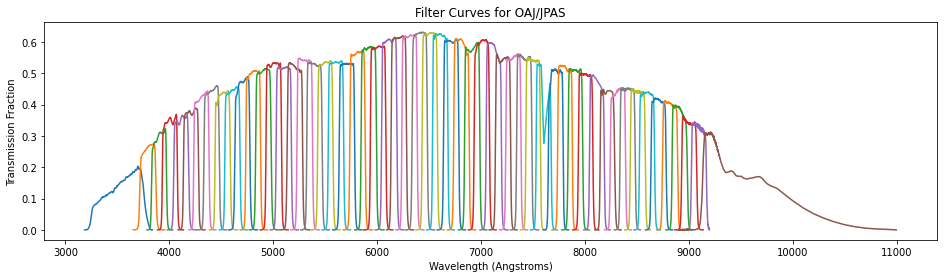

In [6]:
# Plot (54 narrow + 1 medium UV + 1 broad IR) filters curves
plt.subplots(figsize=(16,4))
for k in filters_tx:
    if ((filter_list[filter_list['filterID']==k]['Type'].values=='Narrow')
    or (filter_list[filter_list['filterID']==k]['Type'].values=='Medium1')
    or (filter_list[filter_list['filterID']==k]['Type'].values=='Broad')):
        plt.plot(filters_tx[k]['Wavelength'], filters_tx[k]['Transmission'])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Transmission Fraction')
plt.title('Filter Curves for OAJ/JPAS')
plt.show()
